## Q1. Download the file research-papers.csv from the link below:
https://mitu.co.in/dataset
This file contains the collection research papers received in different categories.
Perform the following operations on it:
1. Read the file
2. Seperate input (summary) and output data (primary category)
3. Explore the output data
4. Prepare and vectorize the data
5. Cross validate the data
6. Build the KNN model for classification with neighbors = 6
7. Evaluate the performance of algorithm

## Import the libraries

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [219]:
df = pd.read_csv('research-papers.csv')

In [220]:
df.head()

,Unnamed: 0,id,Title,Summary,Author,Link,Publish Date,Update Date,Primary Category,Category
0,0,cs/9308101v1,Dynamic Backtracking,Because of their occasional need to return to ...,M. L. Ginsberg,http://arxiv.org/pdf/cs/9308101v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
1,1,cs/9308102v1,A Market-Oriented Programming Environment and ...,Market price systems constitute a well-underst...,M. P. Wellman,http://arxiv.org/pdf/cs/9308102v1,1993-08-01T00:00:00Z,1993-08-01T00:00:00Z,cs.AI,['cs.AI']
2,2,cs/9309101v1,An Empirical Analysis of Search in GSAT,We describe an extensive study of search in GS...,I. P. Gent,http://arxiv.org/pdf/cs/9309101v1,1993-09-01T00:00:00Z,1993-09-01T00:00:00Z,cs.AI,['cs.AI']
3,3,cs/9311101v1,The Difficulties of Learning Logic Programs wi...,As real logic programmers normally use cut (!)...,F. Bergadano,http://arxiv.org/pdf/cs/9311101v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']
4,4,cs/9311102v1,Software Agents: Completing Patterns and Const...,To support the goal of allowing users to recor...,J. C. Schlimmer,http://arxiv.org/pdf/cs/9311102v1,1993-11-01T00:00:00Z,1993-11-01T00:00:00Z,cs.AI,['cs.AI']


In [221]:
df.columns

Index(['Unnamed: 0', 'id', 'Title', 'Summary', 'Author', 'Link',
       'Publish Date', 'Update Date', 'Primary Category', 'Category'],
      dtype='object')

## Seperate the input and output data

In [222]:
# Input data
X = df['Summary']
# Output data
y = df['Primary Category']

## Exploratory Data Analysis

In [223]:
len(set(y))

154

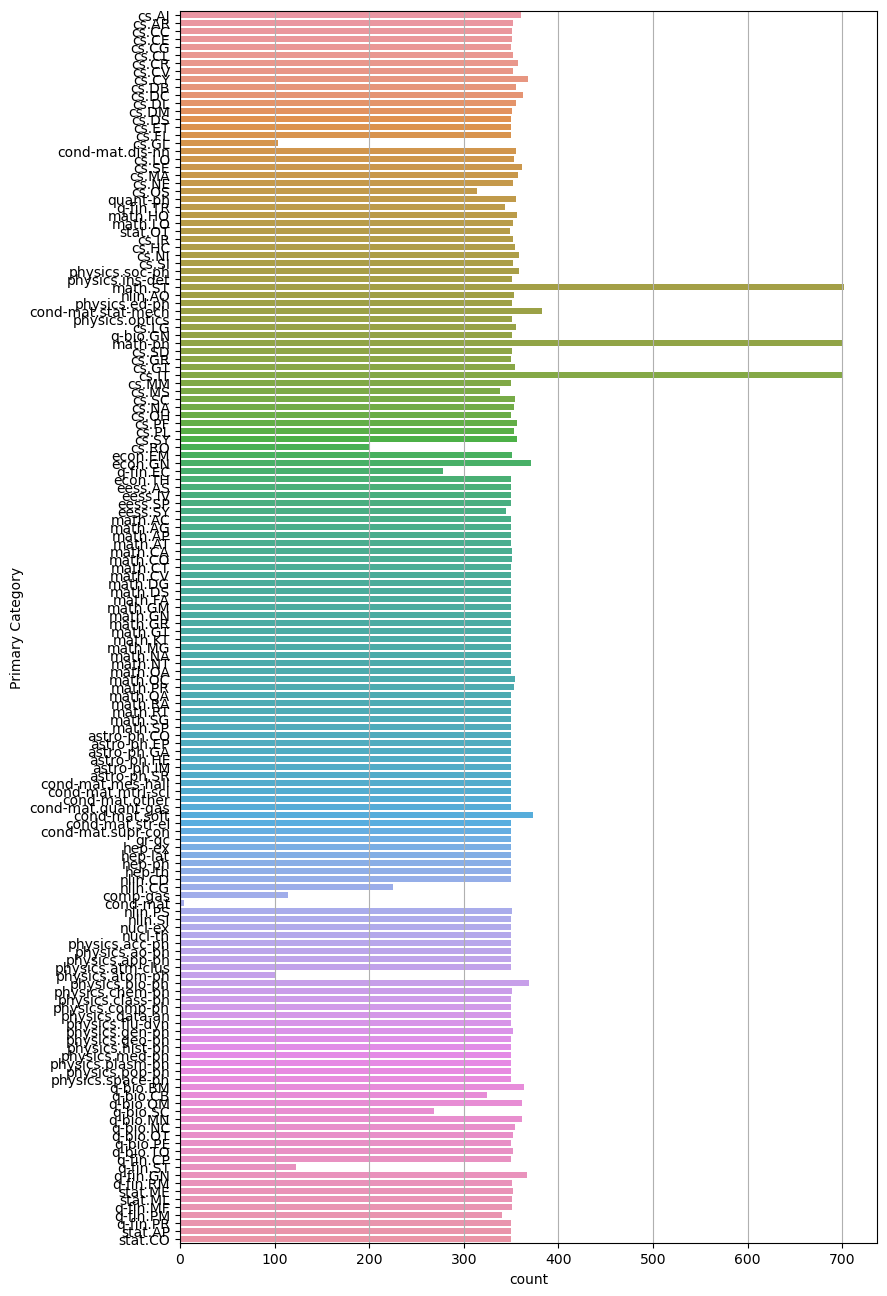

In [224]:
plt.figure(figsize=(9, 16))
plt.grid()
sns.countplot(y=y);

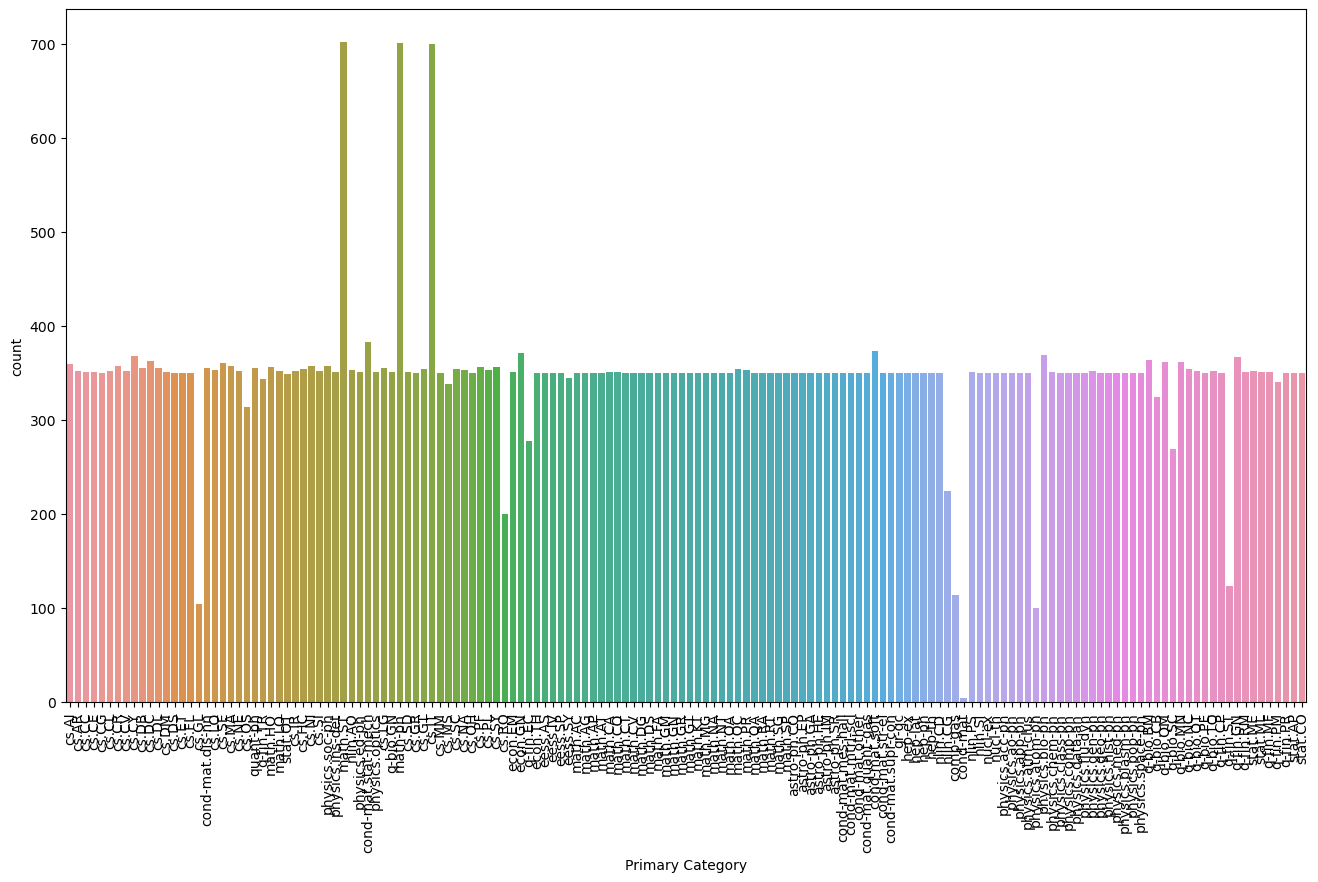

In [225]:
plt.figure(figsize=(16, 9))
sns.countplot(x=y)
plt.xticks(rotation=90)
plt.show()

In [226]:
df['Primary Category'].value_counts()

Primary Category
math.ST               702
math-ph               701
cs.IT                 700
cond-mat.stat-mech    383
cond-mat.soft         373
                     ... 
q-fin.ST              123
comp-gas              114
cs.GL                 104
physics.atom-ph       100
cond-mat                4
Name: count, Length: 154, dtype: int64

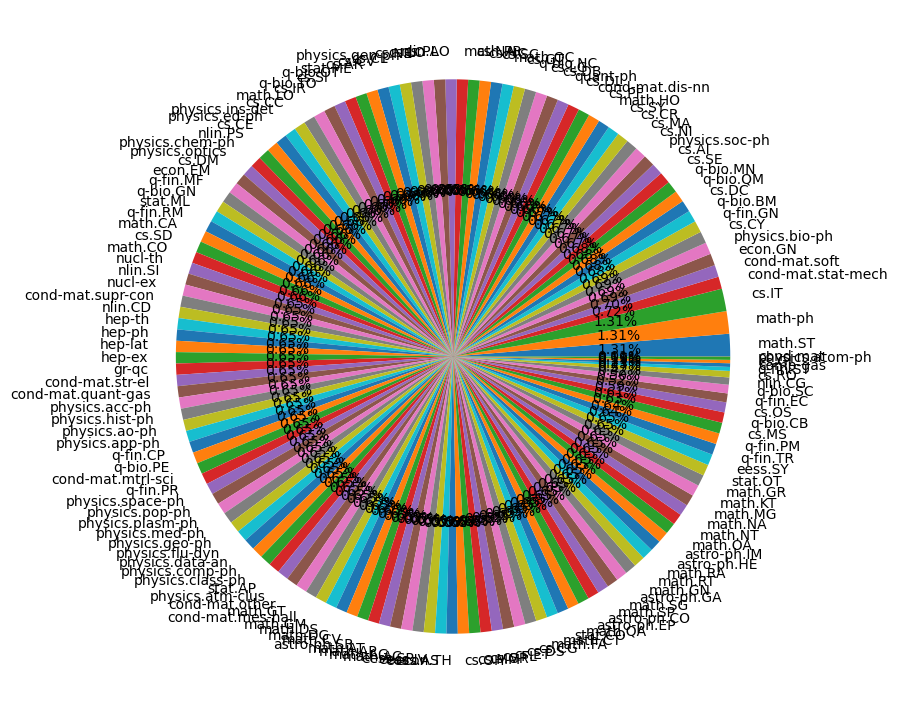

In [227]:
plt.figure(figsize=(16, 9))
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%2.2f%%');

## Data Cleaning

In [228]:
import re
import string

In [229]:
X[6]

'A formalism is presented for computing and organizing actions for autonomous agents in dynamic environments. We introduce the notion of teleo-reactive (T-R) programs whose execution entails the construction of circuitry for the continuous computation of the parameters and conditions on which agent action is based. In addition to continuous feedback, T-R programs support parameter binding and recursion. A primary difference between T-R programs and many other circuit-based systems is that the circuitry of T-R programs is more compact; it is constructed at run time and thus does not have to anticipate all the contingencies that might arise over all possible runs. In addition, T-R programs are intuitive and easy to write and are written in a form that is compatible with automatic planning and learning methods. We briefly describe some experimental applications of T-R programs in the control of simulated and actual mobile robots.'

In [230]:
def clean_txt(paper_txt):
    paper_txt = re.sub('[%s]' % re.escape(string.punctuation), ' ', paper_txt)
    return paper_txt 

In [231]:
cleaned = X.apply(clean_txt)

## TF*IDF Vectorize

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [233]:
tfidf = TfidfVectorizer(stop_words='english')

In [234]:
X_new = tfidf.fit_transform(cleaned)

In [235]:
X_new

<53474x86480 sparse matrix of type '<class 'numpy.float64'>'
	with 2836948 stored elements in Compressed Sparse Row format>

In [236]:
tfidf.get_feature_names_out()

array(['00', '000', '00000000001', ..., 'zynga', 'zynq', 'zz'],
      dtype=object)

## Cross Validation

In [237]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=0)

In [239]:
knn = KNeighborsClassifier(n_neighbors=6)

In [240]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [241]:
y_pred = knn.predict(X_test)

In [242]:
y_pred

array(['cs.OS', 'math.GR', 'cond-mat.supr-con', ..., 'cs.FL', 'q-fin.PR',
       'math.GR'], dtype=object)

In [243]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [244]:
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

       astro-ph.CO       0.50      0.74      0.59       107
       astro-ph.EP       0.56      0.85      0.68        86
       astro-ph.GA       0.42      0.49      0.46        95
       astro-ph.HE       0.57      0.73      0.64        94
       astro-ph.IM       0.43      0.45      0.44        82
       astro-ph.SR       0.45      0.47      0.46        95
          comp-gas       0.19      0.58      0.28        24
          cond-mat       0.00      0.00      0.00         1
   cond-mat.dis-nn       0.31      0.53      0.39        89
 cond-mat.mes-hall       0.45      0.68      0.54        84
 cond-mat.mtrl-sci       0.46      0.53      0.49        88
    cond-mat.other       0.21      0.30      0.25        82
cond-mat.quant-gas       0.38      0.51      0.43        79
     cond-mat.soft       0.33      0.52      0.40        83
cond-mat.stat-mech       0.24      0.33      0.28        88
   cond-mat.str-el       0.56      0.57

In [245]:
accuracy_score(y_test, y_pred)


0.4636846435784277

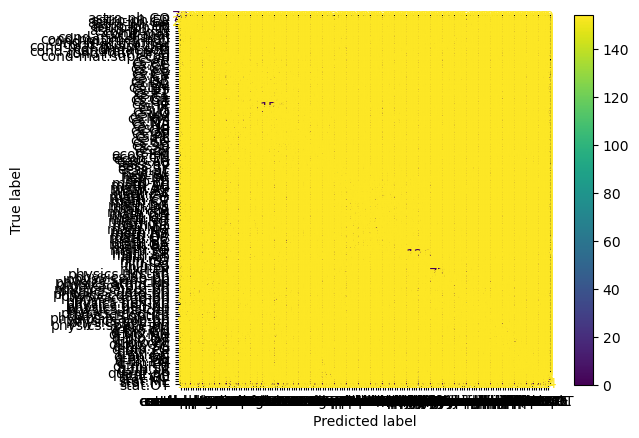

In [246]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Q2. Download the file sarcasm-clusters.txt from the link below:
https://mitu.co.in/dataset
This file contains the collection unlabeled tweets where few are sarcastic and few
are not.
Perform the following operations on it:
1. Read the file
2. Clean, Prepare and vectorize the data
3. Build the K-means clustering algorithm with 2 clusters.
4. Show the tweets with 0 and 1 labels respectively.
5. Find and print sarcastic and non-sarcastic tweet’s top 10 words each.

## Read the file

In [247]:
file = open('sarcasm-clusters.txt')
sarcasm = file.readlines()
file.close()

In [248]:
sarcasm

["It feels like just a few days ago it was the last day of school . Now it's the end of July . 😐 \n",
 "I love my mom . No matter what we go through , no matter how much we argue , because I know , at the end , she'll always be there . \n",
 'Bump that music ... #imtryingtosleep \n',
 "Mexican and black jokes are pretty much the same . Once you've heard Juan , you've heard Jamal .\n",
 'How to find work you love :\n',
 '"@WolfpackAlan : You know what I like to do ? Answer my own questions . "" @elenecoetzer"\n',
 'You seem like a basketball player ! — I am Thank you !\n',
 'Just because you say Swag in every other sentence doesnt mean you have it . \n',
 "if i had my license the only thing i'd use it for is mcdonalds at 3am \n",
 'When people give me directions I tend to concentrate very hard on trying to look attentive and I forget to listen . \n',
 '@pitchfork @EODMofficial WE LOVE YOU ! STAY SAFE WHEREVER YOU ARE !\n',
 "RT Every country has an Independence Day except Britain becaus

In [249]:
df = pd.DataFrame({"text": sarcasm})

In [250]:
df

,text
0,It feels like just a few days ago it was the l...
1,"I love my mom . No matter what we go through ,..."
2,Bump that music ... #imtryingtosleep \n
3,Mexican and black jokes are pretty much the sa...
4,How to find work you love :\n
...,...
51184,RT My EX had one very annoying habit . Breathi...
51185,"Some days you're the Titanic , some days you'r..."
51186,"Congrats on the release of 25 @Adele , let's h..."
51187,doing my favorite thing .. crying \n


In [251]:
df['text']

0        It feels like just a few days ago it was the l...
1        I love my mom . No matter what we go through ,...
2                  Bump that music ... #imtryingtosleep \n
3        Mexican and black jokes are pretty much the sa...
4                            How to find work you love :\n
                               ...                        
51184    RT My EX had one very annoying habit . Breathi...
51185    Some days you're the Titanic , some days you'r...
51186    Congrats on the release of 25 @Adele , let's h...
51187                 doing my favorite thing .. crying \n
51188    @TheSupremEC0URT roommate of the week really l...
Name: text, Length: 51189, dtype: object

## Clean, Prepare and vectorize the data

In [252]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [253]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [254]:
def lemmatize(word):
    tag = pos_tag([word])
    pos='n'
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('R'):
        pos = 'r'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    
    return wnl.lemmatize(word, pos=pos)

In [255]:
def clean_txt(sent):
    tokens1 = word_tokenize(sent)  # Step-1. Tokenize the text
    tokens2 = [token for token in tokens1 if token.isalnum()]  # Step-2 Remove the punctuations
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]  # Step-3 Remove stopwords
    tokens4 = [lemmatize(token) for token in tokens3]  # step-4 Remove the suffixes
    return tokens4 

## TF*IDF Vectorizer

In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [257]:
tf = TfidfVectorizer(analyzer=clean_txt)

In [258]:
X_new = tf.fit_transform(df['text'])

In [259]:
X_new

<51189x42845 sparse matrix of type '<class 'numpy.float64'>'
	with 421419 stored elements in Compressed Sparse Row format>

## Create the clusters

In [260]:
from sklearn.cluster import KMeans

In [261]:
km = KMeans(random_state=0, n_clusters=2)

In [262]:
km.fit_predict(X_new)

c:\Users\kunal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 0, 0, 0])

In [263]:
set(km.labels_)

{0, 1}

In [264]:
km.inertia_   # Sum of squared errors 

50673.20421084634

## Elbow Method

In [265]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k,random_state=0)
    km.fit_predict(X_new)
    sse.append(km.inertia_)

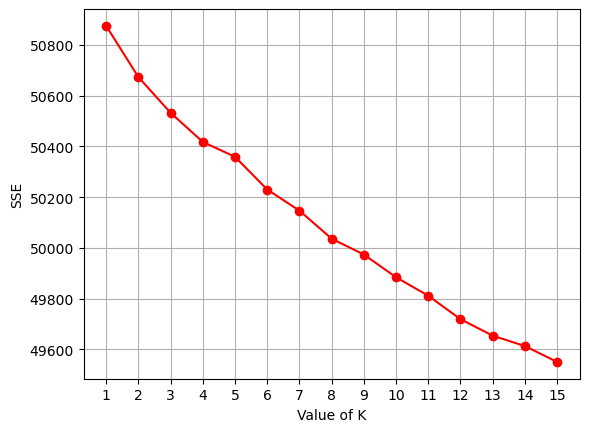

In [266]:
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1,16),sse,marker='o',color='r')

## Build the K-means clustering algorithm with 2 clusters.

In [267]:
km = KMeans(n_clusters=2, random_state=0, n_init='auto')

In [268]:
labels = km.fit_predict(X_new)

In [269]:
labels

array([0, 0, 0, ..., 0, 0, 0])

## Show the tweets with 0 and 1 labels respectively.

In [270]:
zero = df[labels == 0]
one = df[labels == 1]

In [271]:
zero  # Not Sarcastic

,text
0,It feels like just a few days ago it was the l...
1,"I love my mom . No matter what we go through ,..."
2,Bump that music ... #imtryingtosleep \n
3,Mexican and black jokes are pretty much the sa...
4,How to find work you love :\n
...,...
51184,RT My EX had one very annoying habit . Breathi...
51185,"Some days you're the Titanic , some days you'r..."
51186,"Congrats on the release of 25 @Adele , let's h..."
51187,doing my favorite thing .. crying \n


In [272]:
one  # Sarcastic

,text
22,"""me liking your selfie could either mean """" th..."
86,"If people want bareback , they don't have any ..."
126,If you want to get caught up on the awesome SL...
174,I don't want to ask because I'm scared of the ...
179,#Esteban is #not a name u want ur daughter dat...
...,...
51091,It makes me so mad when I come home to no food...
51132,If you want to understand how economists think...
51148,God .. i cant wait til my #King find me ... Th...
51150,Yay got into all the classes I wanted for next...


In [273]:
one['text'].iloc[4]

'#Esteban is #not a name u want ur daughter dating . #oyVey \n'

In [274]:
print("'Cluster-0:", len(zero))
print("'Cluster-1:", len(one))

'Cluster-0: 49580
'Cluster-1: 1609


## Find and print sarcastic and non-sarcastic tweet’s top 10 words each.

## Wordcloud

### Zeroth cluster

In [275]:
from wordcloud import WordCloud

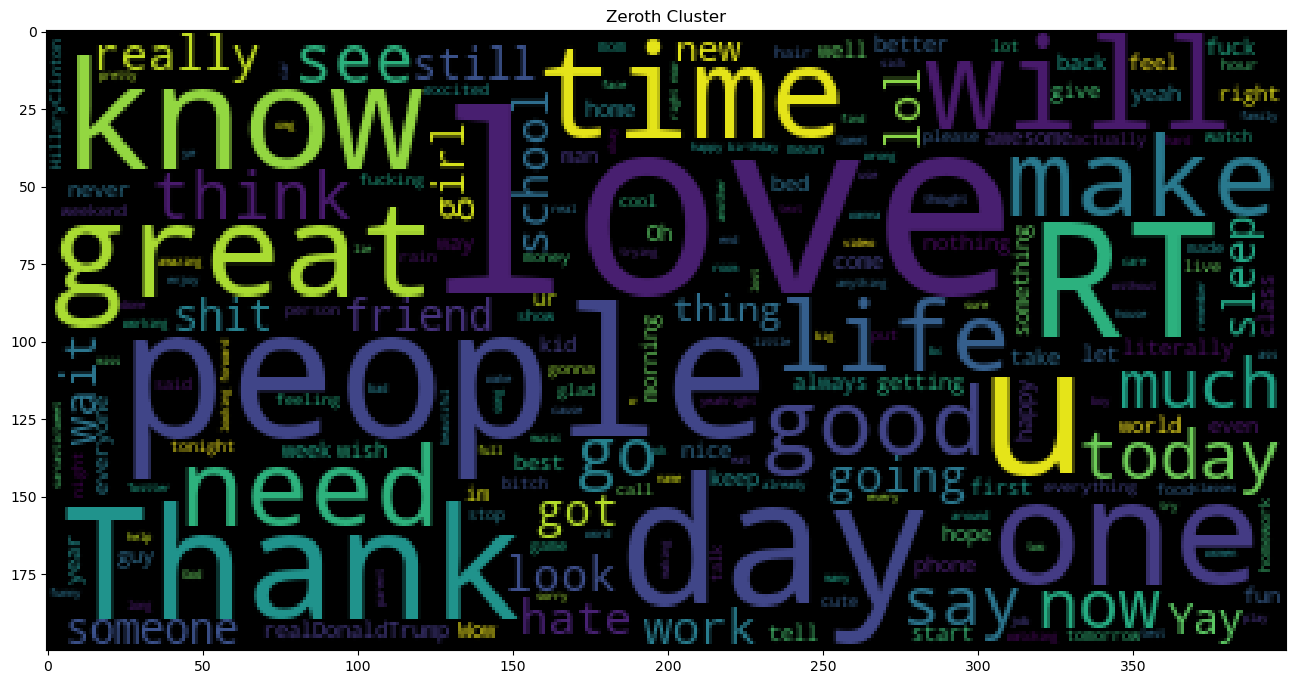

In [276]:
wc = WordCloud().generate(' '.join(zero['text']))
plt.figure(figsize=(16,9))
plt.title('Zeroth Cluster')
plt.imshow(wc);

In [277]:
from nltk import FreqDist

In [278]:
swords = stopwords.words('english')

In [279]:
new = ' '.join(zero['text'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
print("Top 10 words from non-sarcastic tweets: ")
freq.most_common(10)

Top 10 words from non-sarcastic tweets: 


[('love', 4501),
 ('like', 3740),
 ('day', 2462),
 ('get', 2315),
 ('people', 2117),
 ('RT', 1791),
 ('good', 1755),
 ('one', 1706),
 ('great', 1701),
 ('time', 1670)]

### First Cluster

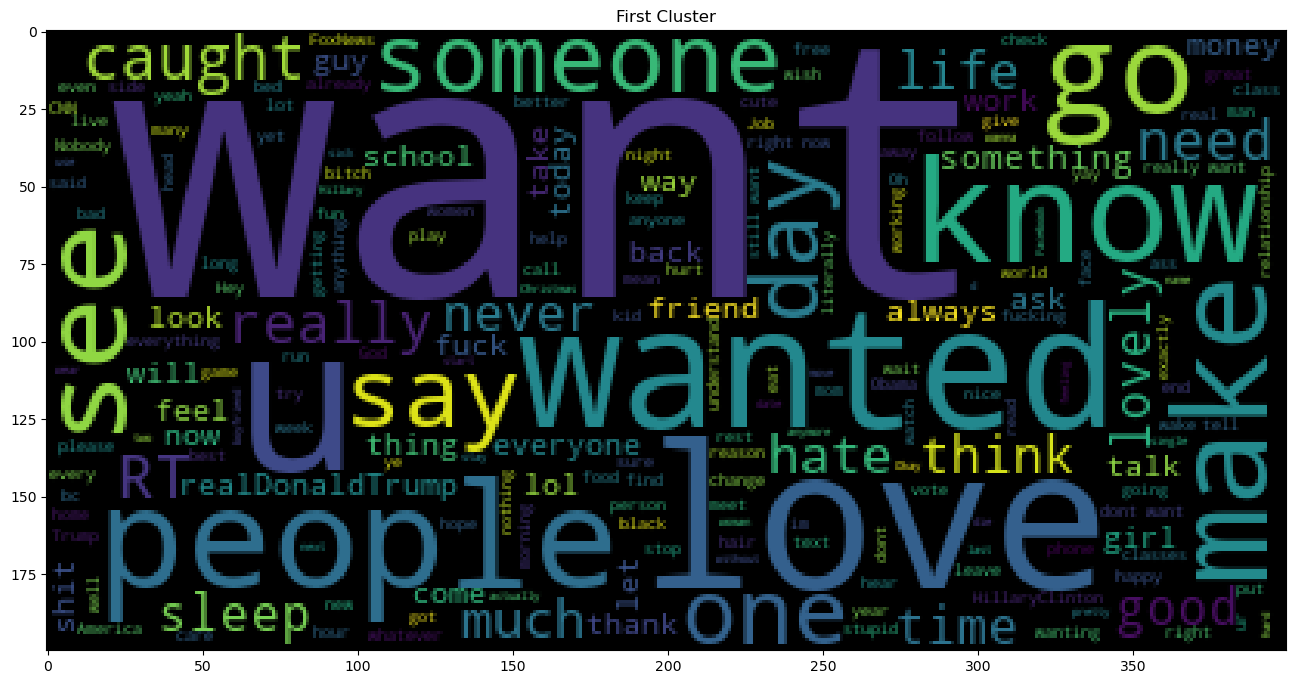

In [280]:
wc = WordCloud().generate(' '.join(one['text']))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc);

In [281]:
new = ' '.join(one['text'])
clean = [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq = FreqDist(clean)
print("Top 10 words from sarcastic tweets: ")
freq.most_common(10)

Top 10 words from sarcastic tweets: 


[('want', 1244),
 ('wants', 186),
 ('get', 182),
 ('wanted', 149),
 ('like', 134),
 ('love', 130),
 ('people', 105),
 ('know', 104),
 ('u', 104),
 ('really', 94)]